# 01 - Criando Séries Temporais
Esse notebook mostra algumas formas de criar e séries temporais através de dados transacionais. Iremos usar uma tabela com os lançamentos da Netflix. Mais informações sobre a tabela [aqui](https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows/code).

Links importantes:
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
- https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas.DataFrame.resample

## Preparação dos dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../../dados/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df['date_added']=pd.to_datetime(df['date_added'], format='%B %d, %Y', errors = 'coerce')
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        95
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df['director'] = df['director'].fillna('No Director')
df['cast'] = df['cast'].fillna('No Cast')
df['country'] = df['country'].fillna('No Country')
df['rating'] = df['rating'].fillna('No Rating')
df['duration'] = df['duration'].fillna('No Duration')
df = df[~df['date_added'].isna()]
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Primeiro exemplo:
Análise dos lançamentos da Netflix:

    - Acumular dados usando contagem e mês (resample('MS').size())
    - Verificar se existem dados faltantes e preencher.
    - Gerar o gráfico das séries temporais

In [6]:
lancamentos = df.set_index('date_added').resample('MS').size()

In [7]:
lancamentos = lancamentos.drop(lancamentos.index[-3])

In [8]:
all_months = pd.date_range(start=lancamentos.index.min(), end=lancamentos.index.max(), freq='MS')
missing_months = all_months.difference(lancamentos.index)

# Resultado
if missing_months.empty:
    print("Nenhum mês faltando.")
else:
    print("Meses faltando:", missing_months)

Meses faltando: DatetimeIndex(['2021-07-01'], dtype='datetime64[ns]', freq='MS')


In [9]:
lancamentos_zero = lancamentos.reindex(all_months, fill_value=0)
lancamentos_zero


2008-01-01      1
2008-02-01      1
2008-03-01      0
2008-04-01      0
2008-05-01      0
             ... 
2021-05-01    132
2021-06-01    207
2021-07-01      0
2021-08-01    178
2021-09-01    183
Freq: MS, Length: 165, dtype: int64

In [10]:
lancamentos_ffill = lancamentos.reindex(all_months).ffill()
lancamentos_ffill

2008-01-01      1.0
2008-02-01      1.0
2008-03-01      0.0
2008-04-01      0.0
2008-05-01      0.0
              ...  
2021-05-01    132.0
2021-06-01    207.0
2021-07-01    207.0
2021-08-01    178.0
2021-09-01    183.0
Freq: MS, Length: 165, dtype: float64

In [11]:
lancamentos_bfill = lancamentos.reindex(all_months).bfill()
lancamentos_bfill


2008-01-01      1.0
2008-02-01      1.0
2008-03-01      0.0
2008-04-01      0.0
2008-05-01      0.0
              ...  
2021-05-01    132.0
2021-06-01    207.0
2021-07-01    178.0
2021-08-01    178.0
2021-09-01    183.0
Freq: MS, Length: 165, dtype: float64

In [12]:
lancamentos_neighbors = lancamentos.reindex(all_months).interpolate(method='linear')
lancamentos_neighbors

2008-01-01      1.0
2008-02-01      1.0
2008-03-01      0.0
2008-04-01      0.0
2008-05-01      0.0
              ...  
2021-05-01    132.0
2021-06-01    207.0
2021-07-01    192.5
2021-08-01    178.0
2021-09-01    183.0
Freq: MS, Length: 165, dtype: float64

Uma das vantagens de se trabalhar com pd.Series é a facilidade de plotar a série:

<Axes: xlabel='date_added'>

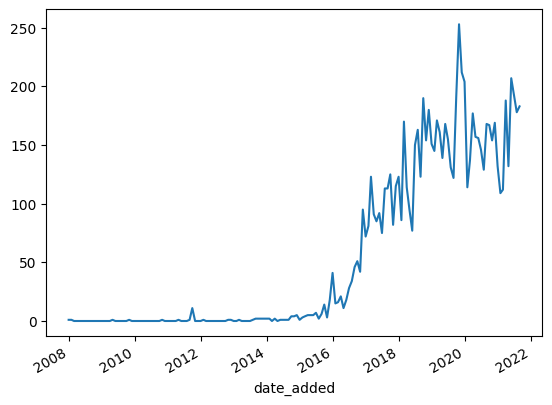

In [13]:
lancamentos.plot()

Outra vantagem seria a facilidade de filtrar datas:

<Axes: xlabel='date_added'>

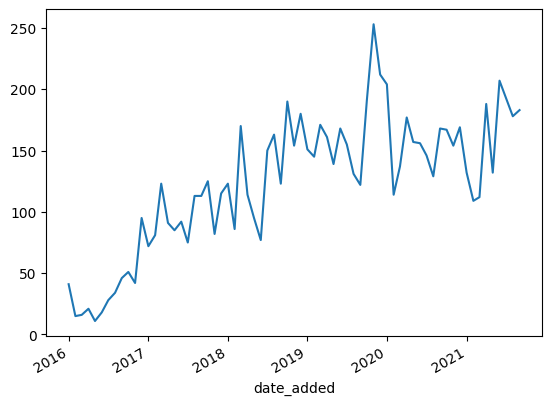

In [14]:
lancamentos[lancamentos.index.year >= 2016].plot()

Essa função gera um gráfico um pouco mais informativo:

In [15]:
def plot_series(serie):
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index, serie, marker='o', linestyle='-')
    plt.title(f"Lançamentos por Mês e Ano" , fontsize=14)
    plt.xlabel("Mês e Ano", fontsize=12)
    plt.ylabel("Quantidade de Lançamentos", fontsize=12)
    plt.xticks(serie.index, serie.index.strftime('%b %Y'), rotation=45, ha='right')
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

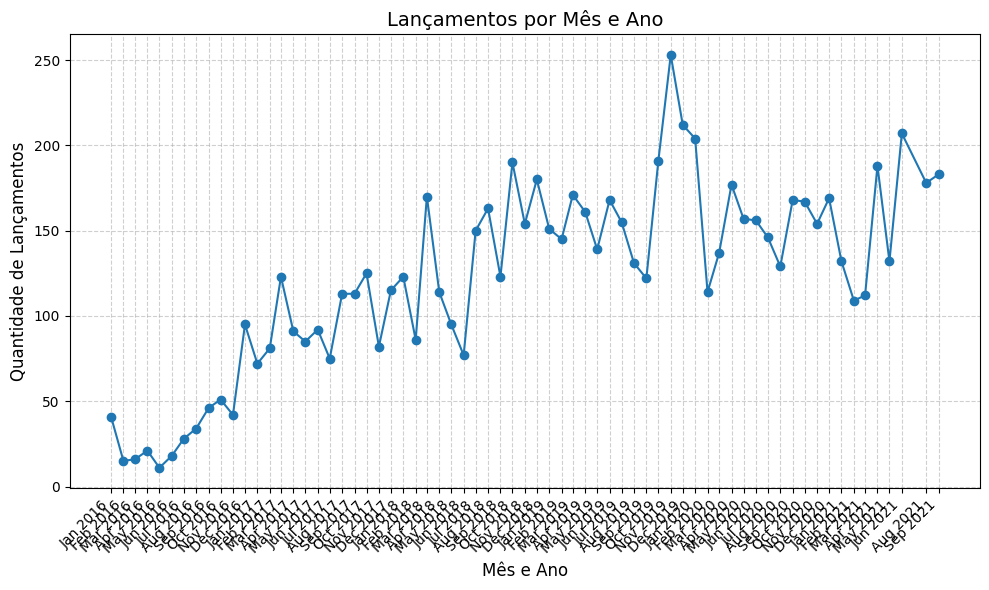

In [16]:
lancamentos = lancamentos[lancamentos.index.year >= 2016]
plot_series(lancamentos)


Essa próxima parte vai mostrar a diferença de diferentes tratamentos de missings.

In [17]:
# Tratamento de missings em "lancamentos"

all_months = pd.date_range(start=lancamentos.index.min(), end=lancamentos.index.max(), freq='MS')

# 1. Preenchimento com Zero
lancamentos_zero = lancamentos.reindex(all_months, fill_value=0)

# 2. Preenchimento com Valor Anterior
lancamentos_ffill = lancamentos.reindex(all_months).ffill()

# 3. Preenchimento com Valor Posterior
lancamentos_bfill = lancamentos.reindex(all_months).bfill()

# 4. Média dos vizinhos mais próximos
lancamentos_neighbors = lancamentos.reindex(all_months).interpolate(method='linear')

# 5. Interpolação Linear
lancamentos_linear = lancamentos.reindex(all_months).interpolate(method='linear')

# 6. Interpolação Quadrática
lancamentos_quadratic = lancamentos.reindex(all_months).interpolate(method='quadratic')

In [18]:
def plot_series(serie, type_fill):
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index, serie, marker='o', linestyle='-')
    plt.title(f"Lançamentos por Mês e Ano - {type_fill}" , fontsize=14)
    plt.xlabel("Mês e Ano", fontsize=12)
    plt.ylabel("Quantidade de Lançamentos", fontsize=12)
    plt.xticks(serie.index, serie.index.strftime('%b %Y'), rotation=45, ha='right')
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

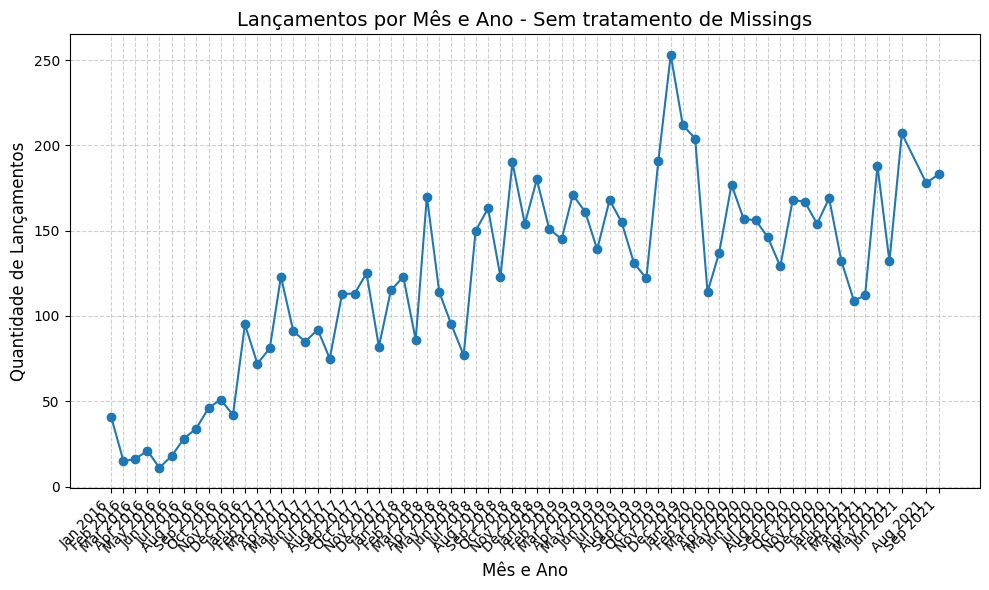

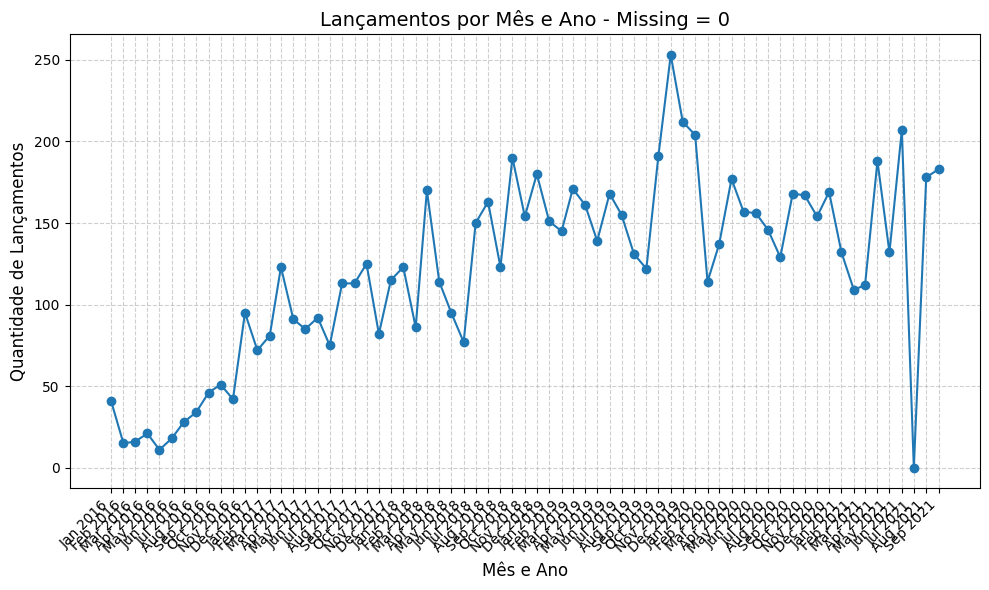

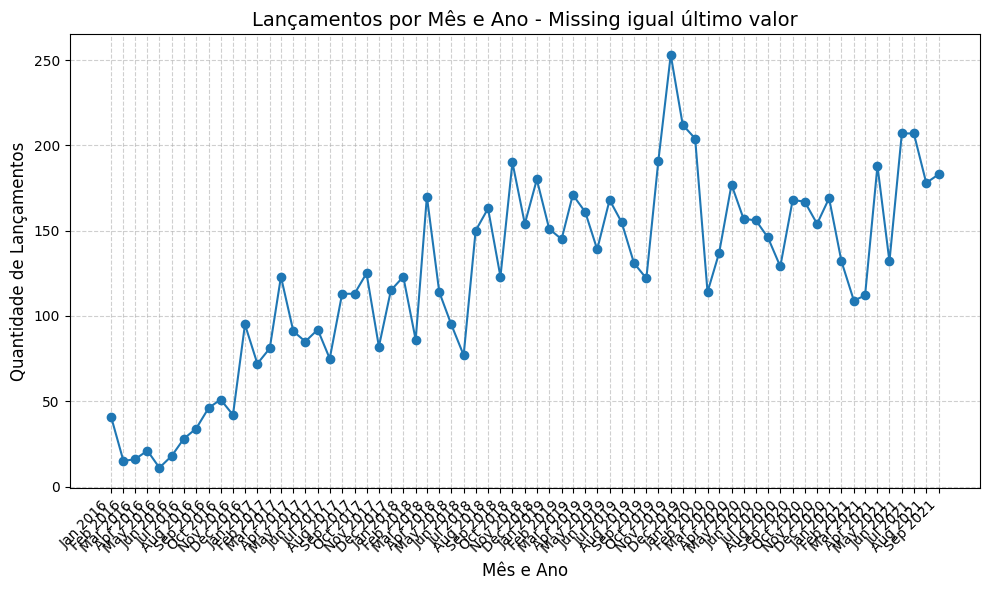

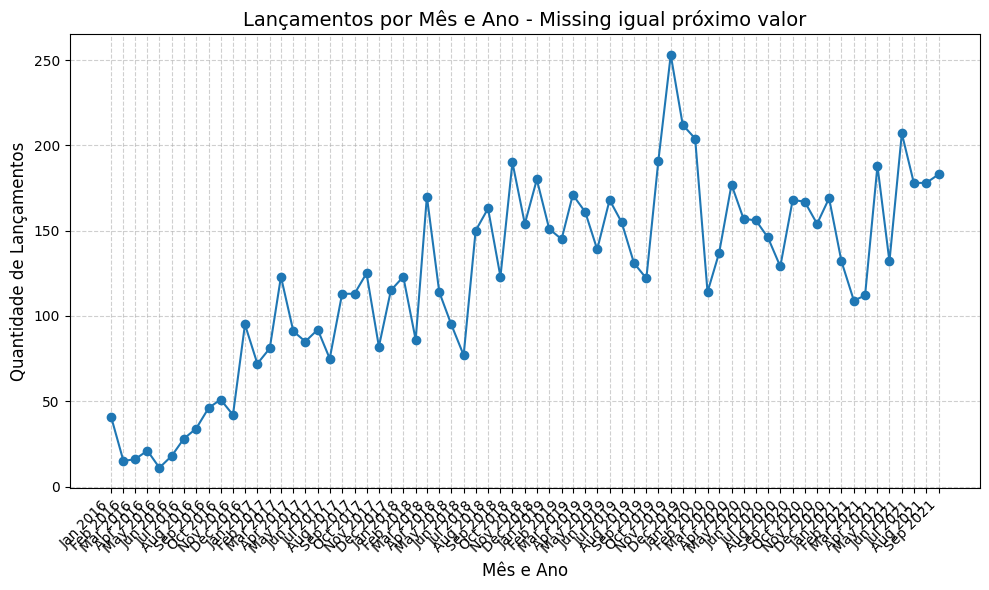

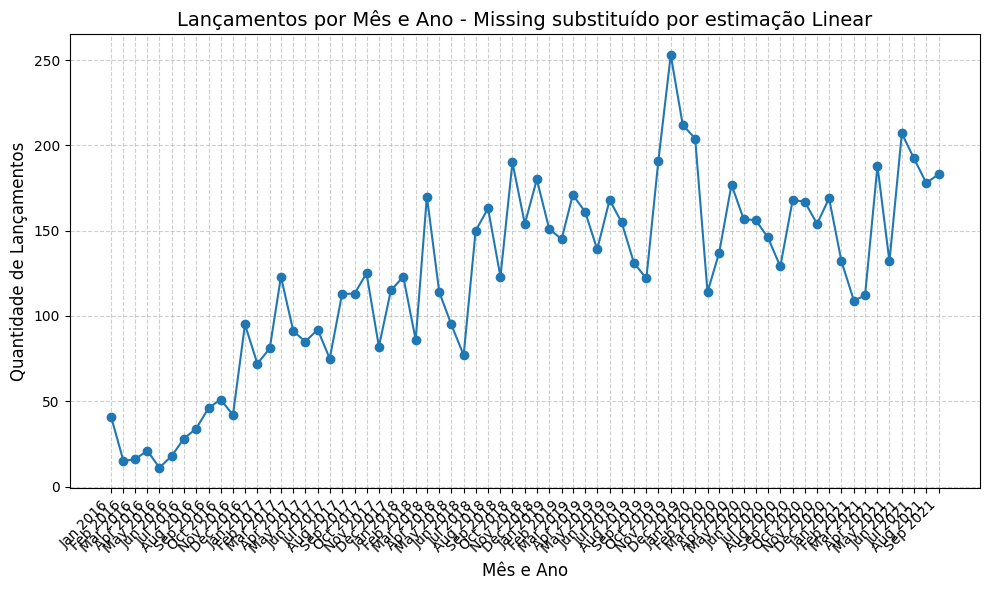

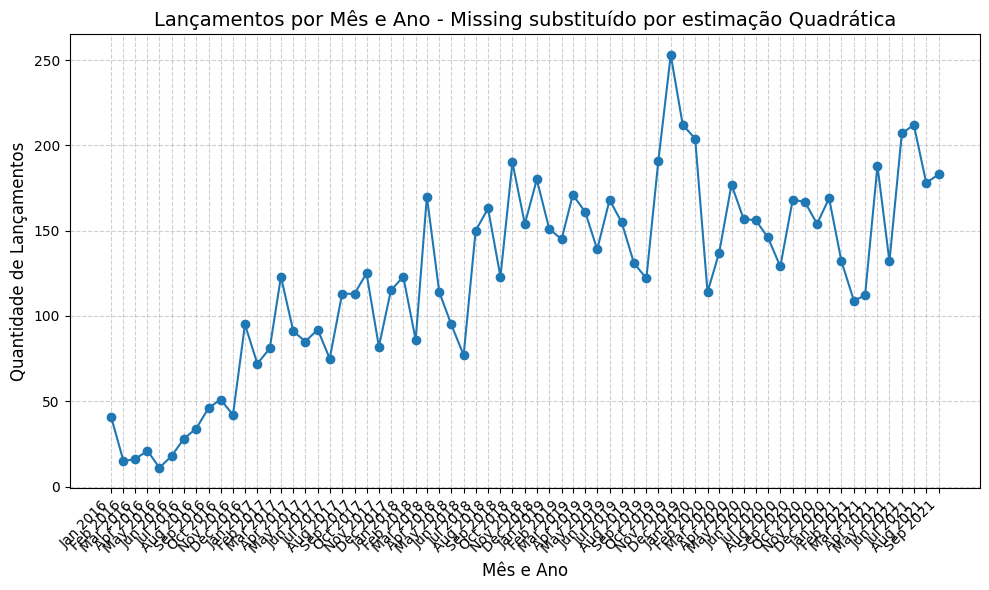

In [19]:
series = [lancamentos, lancamentos_zero, lancamentos_ffill, lancamentos_bfill, lancamentos_linear, lancamentos_quadratic]
tipo_preenchimento = ['Sem tratamento de Missings', 'Missing = 0', 'Missing igual último valor',
                      'Missing igual próximo valor', 'Missing substituído por estimação Linear', 'Missing substituído por estimação Quadrática']

for s, t in zip(series, tipo_preenchimento):
    plot_series(s, t)